In [241]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import euler as euler
from modules import rs_rad_ker as rk
from modules import qu2eb_operator as qb

%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [238]:
nside=16 ; npix=h.nside2npix(nside)
sampling=4500
lmax=2*nside

pxsize=sqrt(4.*pi/h.nside2npix(nside))
beta0=min(180,180.*32/(3*nside))*pi/180. ; print beta0*180/pi

theta,pl2=rk.get_plm0(lmax,sampling,theta_max=min(pi,3.*beta0))

120.0


In [162]:
#cltemp=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")
cltemp=h.read_cl("../../data/cl_rem3.fits")
clr=[cltemp[0],cltemp[1],cltemp[2]*0.1,cltemp[3]*0]
#random.seed(0) ; tqu=h.synfast(cllens,nside,lmax=lmax,mmax=lmax,pol=True,new=True,verbose=False)
#alm=h.map2alm(tqu,lmax=lmax)
#teb=h.alm2map(alm,nside,pol=False)
#cl=h.alm2cl(alm)

In [244]:
def get_alm(cl,lmax,mmax,seed=0):
    random.seed(seed)
    almsize=h.Alm.getsize(lmax,mmax)
    ar=random.normal(size=almsize)
    ai=random.normal(size=almsize)
    alm=zeros(almsize,complex)
    for i in range(almsize):
        l,m=h.Alm.getlm(lmax,i)
        if m==0:
            alm[i]=complex(ar[i],0.)*sqrt(cl[l])
        else:
            alm[i]=complex(ar[i],ai[i])*sqrt(0.5*cl[l])
    return alm

In [270]:
mmax=5
##########################################################
almt=get_alm(clr[0],lmax,mmax,1) ; alme=get_alm(clr[1],lmax,mmax,2) ; almb=get_alm(clr[2],lmax,mmax,3)
true_alm=[almt,alme,almb] 
tteb=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=False) ; cltrue=h.alm2cl(true_alm,lmax=lmax,mmax=mmax)

tqu=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=True) 
alm=h.map2alm(tqu,lmax=lmax,mmax=mmax,iter=0)
hteb=h.alm2map(alm,nside,pol=False,lmax=lmax,mmax=mmax) ; cl=h.alm2cl(alm,lmax=lmax,mmax=mmax) 

##########################################################
almt=get_alm(clr[0],lmax,mmax,4) ; alme=get_alm(clr[1],lmax,mmax,5) ; almb=get_alm(clr[2],lmax,mmax,6)
true_alm=[almt,alme,almb] 
tteb1=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=False) ; cltrue=h.alm2cl(true_alm,lmax=lmax,mmax=mmax)

tqu1=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=True) 
alm=h.map2alm(tqu,lmax=lmax,mmax=mmax,iter=0)
hteb1=h.alm2map(alm,nside,pol=False,lmax=lmax,mmax=mmax) ; cl1=h.alm2cl(alm,lmax=lmax,mmax=mmax)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


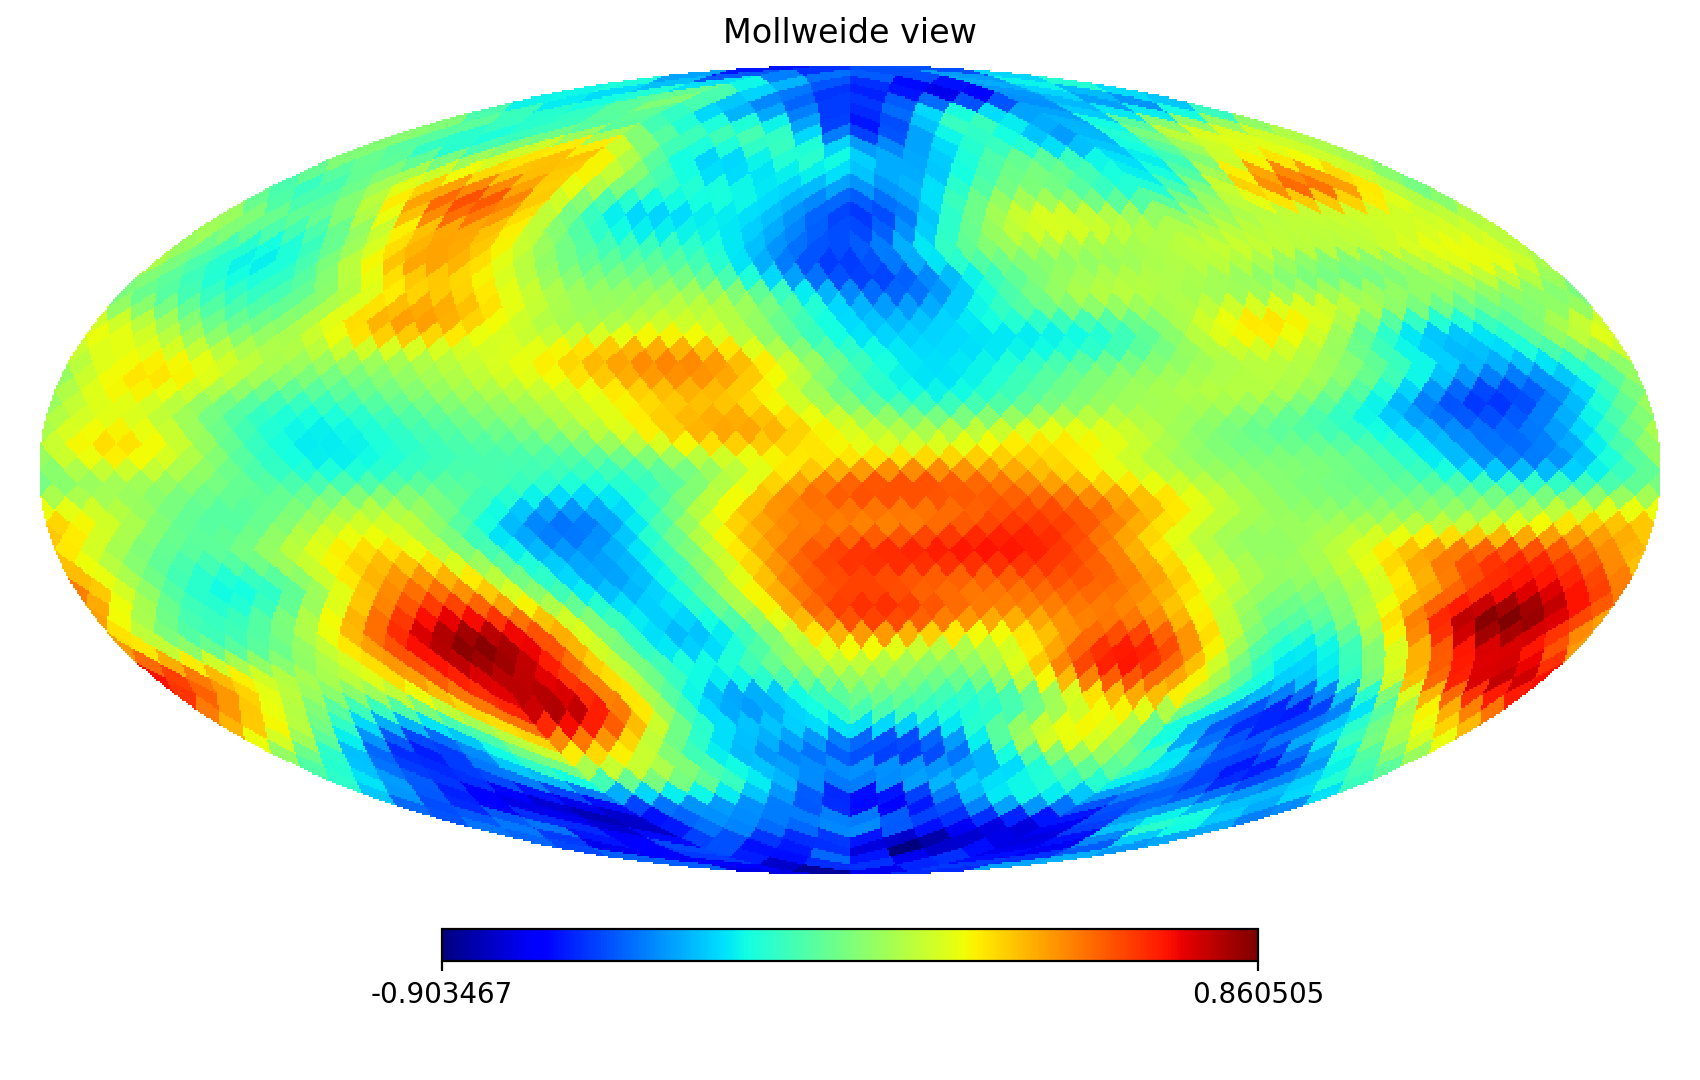

In [271]:
h.mollview(hteb[1])

In [163]:
apow=rk.fn_apodization(theta,theta_cutoff=theta_cutoff,apow_frac=0.001) ; apow[:]=1.
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)# Default
#rad_ker=rk.mod_rad_ker(theta,shift=0.05,amp=1,width=0.01,slope=2,expslope=2)# Modified

<IPython.core.display.Javascript object>


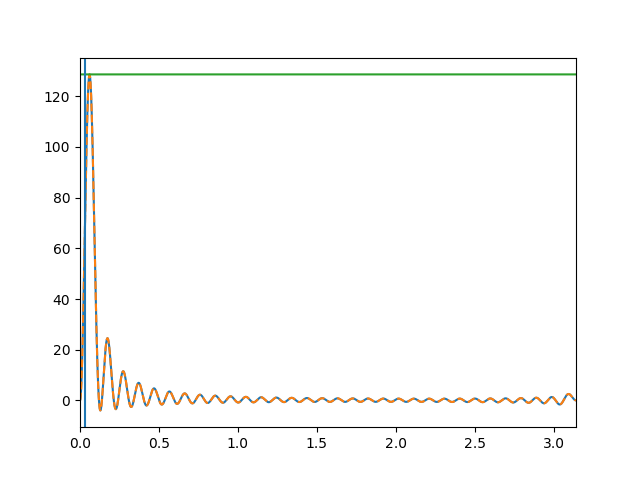

In [145]:
figure()
plot(theta,rad_ker)
plot(theta,rad_ker*apow,"--")
plot(theta,apow*max(rad_ker))
axvline(pxsize)
xlim(0,min(pi,1.5*theta_cutoff))
rad_ker=rad_ker*apow

In [146]:
ell=arange(lmax+1)
gl=rk.get_gl_from_gbeta(theta,rad_ker,pl2,theta_cutoff,lmax) ;# gl[0:2]=1
rec_rad_ker=rk.get_gbeta_from_gl(theta,gl,pl2)

<IPython.core.display.Javascript object>


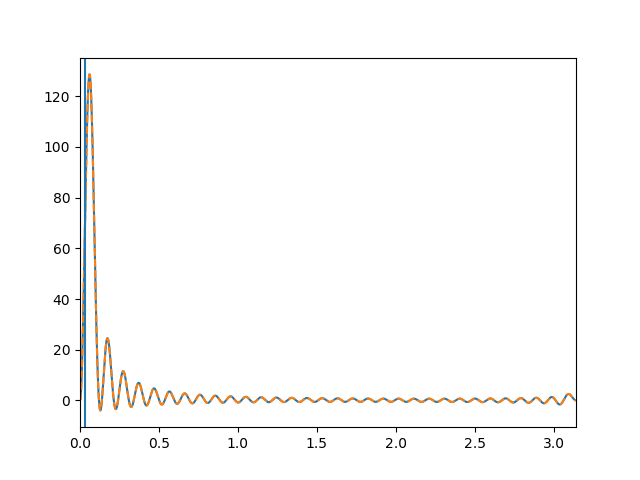

<IPython.core.display.Javascript object>


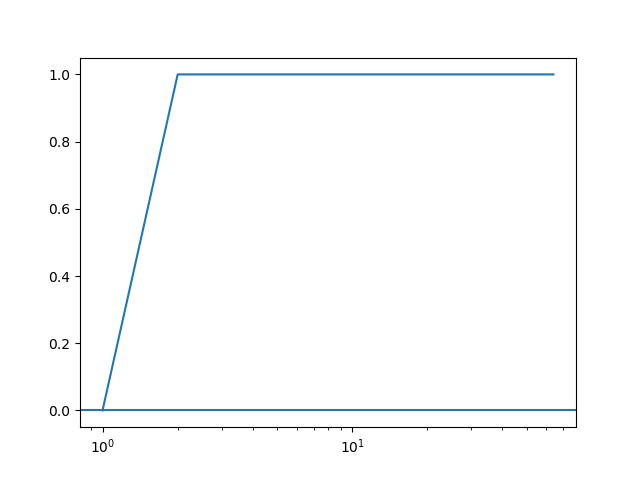

[]

In [147]:
figure()
plot(theta,rad_ker)
plot(theta,rec_rad_ker,"--")
axvline(pxsize)
xlim(0,min(pi,1.5*theta_cutoff))
#loglog()

figure()
plot(arange(lmax+1),gl)
#plot(arange(lmax+1),1)
axhline(0)
semilogx()
#loglog()

#theta0=2.*pi/180. ; phi0=0.
#cpix=h.ang2pix(nside,theta0,phi0)
#tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[2][cpix]=1.
#alm=h.map2alm(tqu,lmax=lmax)
#teb=h.alm2map(alm,nside,pol=False)
#cl=h.alm2cl(alm)

<IPython.core.display.Javascript object>


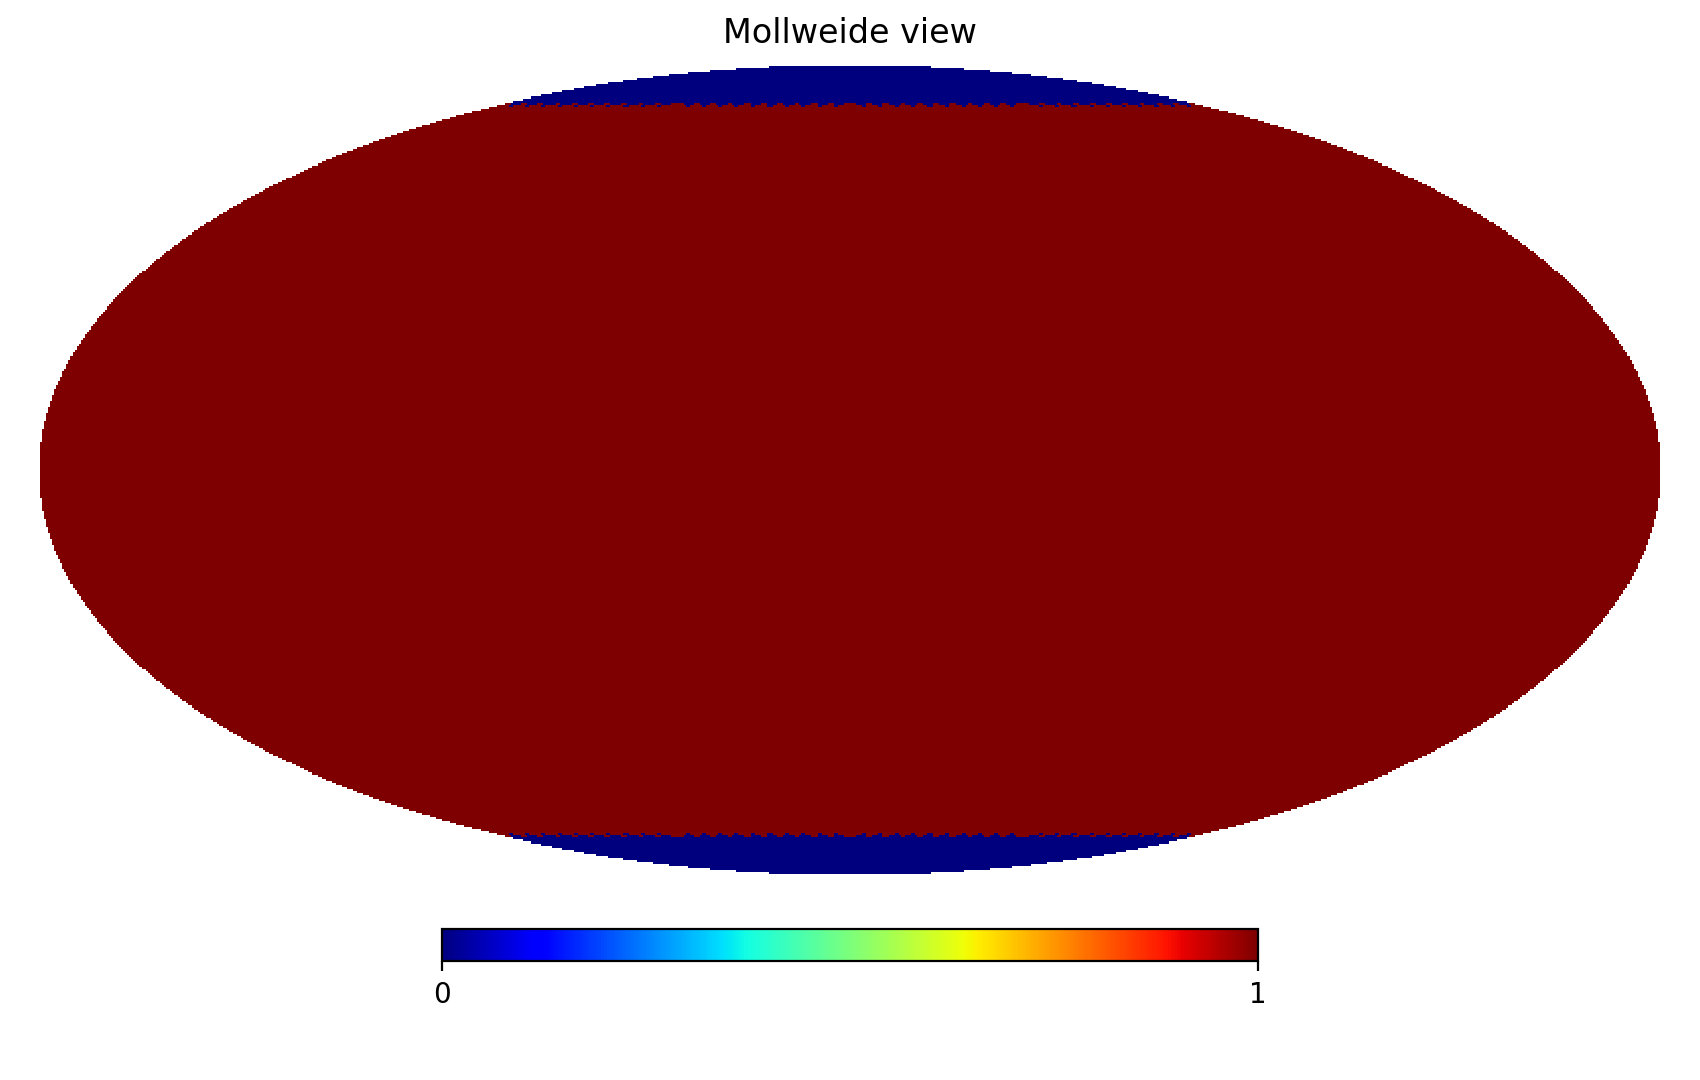

In [204]:
lat=90
tmask=zeros(npix,float)
pmask=zeros(npix,float)
pindex=arange(npix)
theta0,phi0=h.pix2ang(nside,pindex)
theta0=theta0*180/pi ; phi0=phi0*180/pi
wband=75 ; phiband=0
tmask[theta0<lat-wband]=1 ; tmask[theta0>lat+wband]=1.
pmask[phi0<phiband]=1. ; pmask[phi0>360-phiband]=1.
pmask[:]=1.
mask=pmask*(1-tmask) ; fsky=sum(mask)/size(mask)
#mask[:]=1.
h.mollview(mask)

spole=np.zeros(npix,float) ; spole[npix-1]=1.
npole=np.zeros(npix,float) ; npole[0]=1.

In [240]:
tqu[1][:]=1. ; tqu[2][:]=1.
t1=time.time()
rteb=qb.convert_qu2eb_radiate_masked(tqu[1],tqu[2],theta_cutoff,theta,rad_ker)
print time.time()-t1

t1=time.time()
iteb=qb.convert_qu2eb_integrate_masked(tqu1[1],tqu1[2],theta_cutoff,theta,rad_ker)
print time.time()-t1

5.02255392075
5.34658384323


alm=h.map2alm(rteb,lmax=lmax)
alm=[h.almxfl(alm[i],1./gl,inplace=True) for i in range(3)]
rtebp=h.alm2map(alm,nside,pol=False)

alm=h.map2alm(rtebo,lmax=lmax)
alm=[h.almxfl(alm[i],1./gl,inplace=True) for i in range(3)]
rtebop=h.alm2map(alm,nside,pol=False)

h.write_map("../../figures/new_results/radiating_rteb_masked.fits",rtebo,overwrite=True)
h.write_map("../../figures/new_results/integrated_rteb_masked.fits",rteb,overwrite=True)
h.write_map("../../figures/new_results/teb_fullsky.fits",teb,overwrite=True)
h.write_map("../../figures/new_results/mask.fits",mask,overwrite=True)

<IPython.core.display.Javascript object>


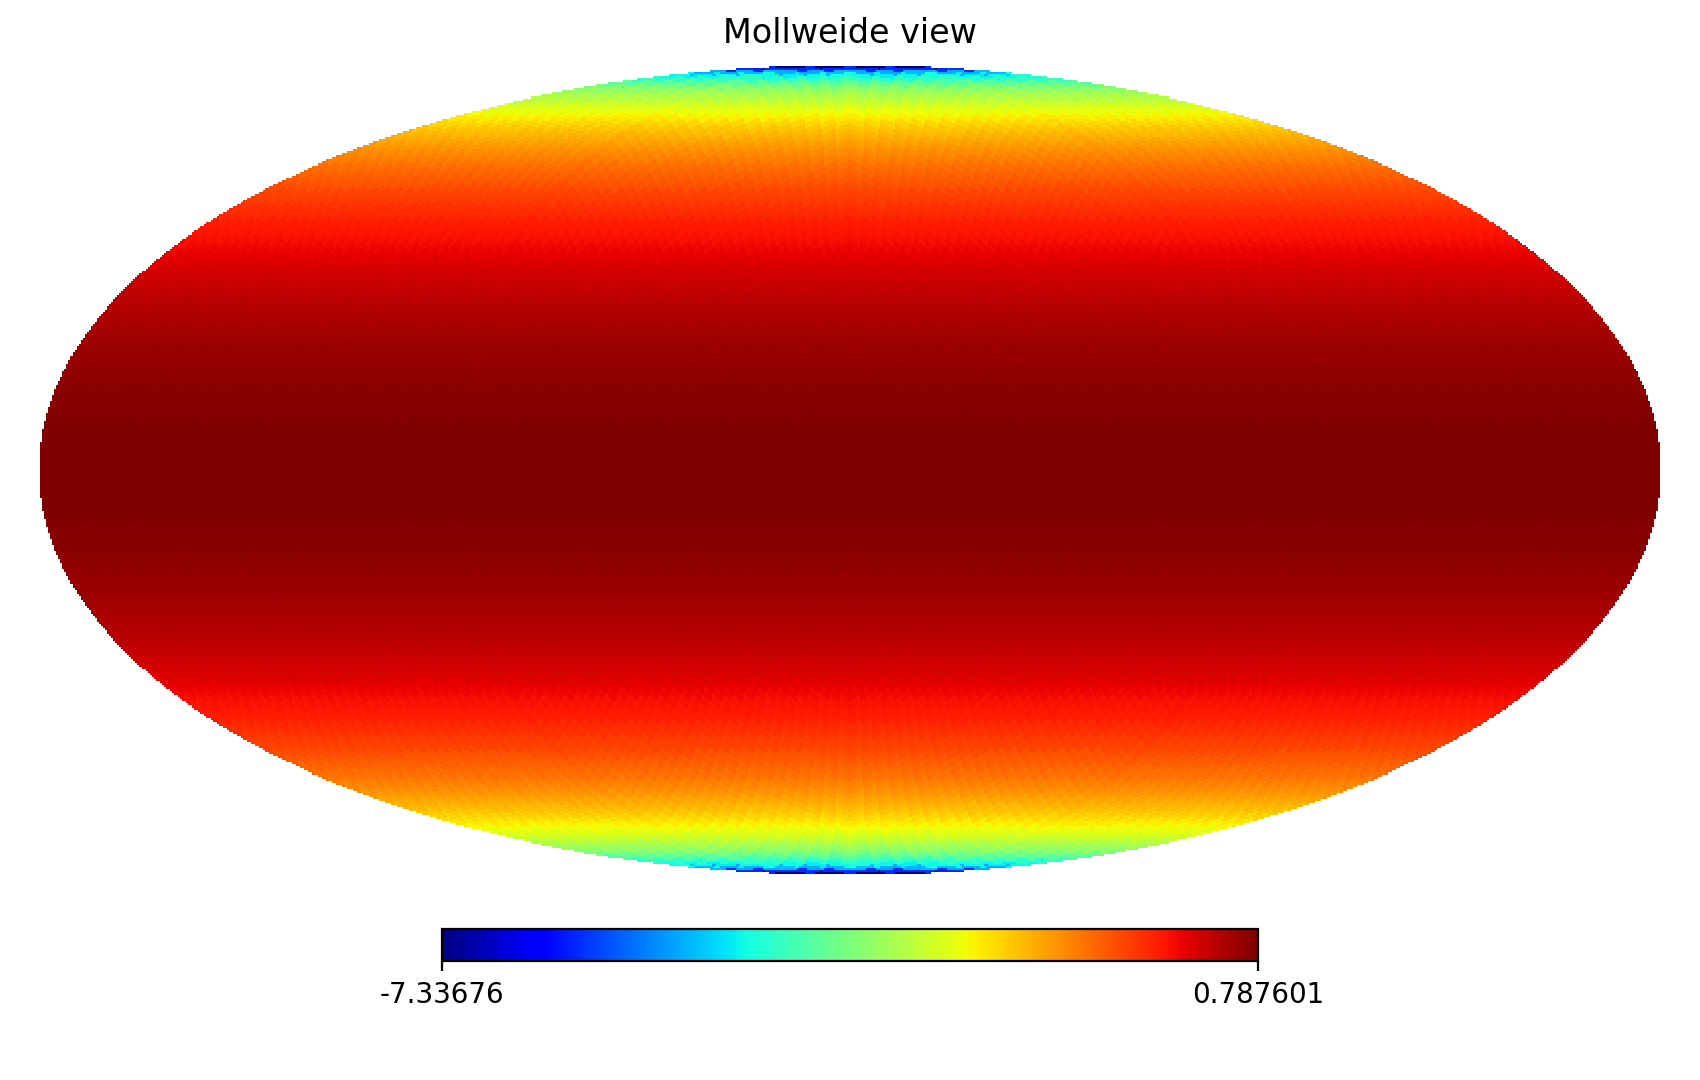

<IPython.core.display.Javascript object>


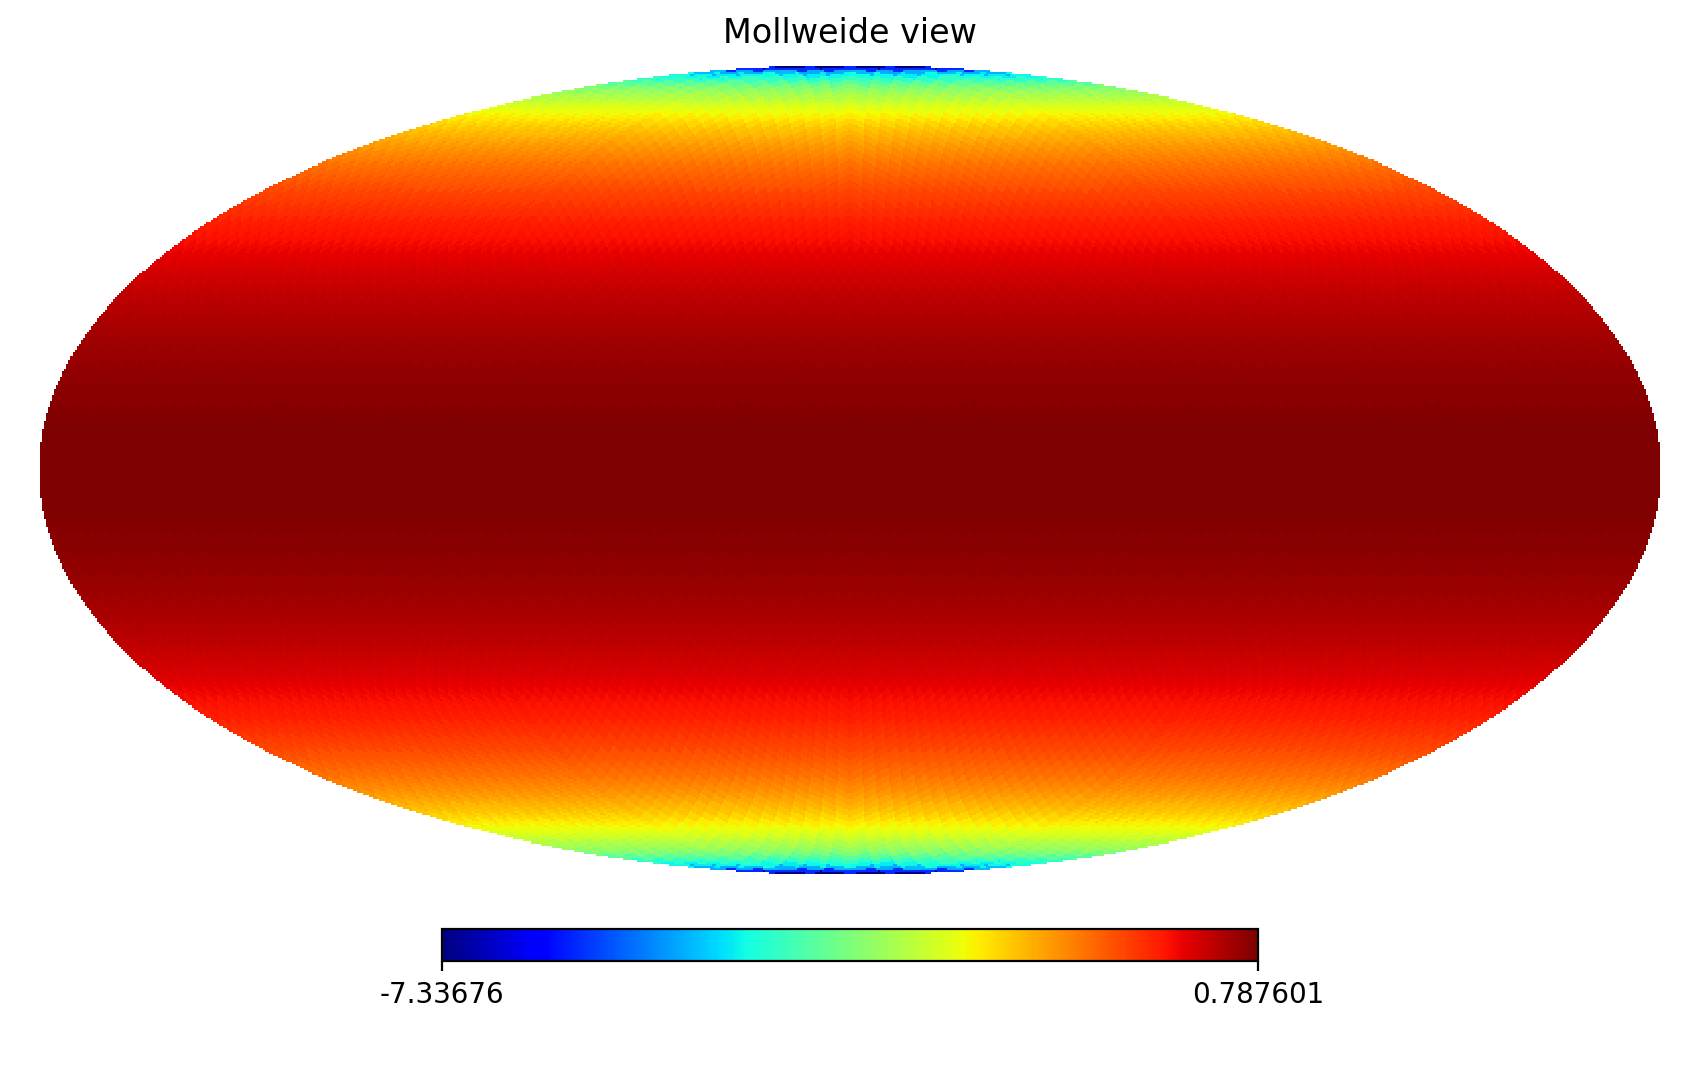

In [235]:
h.mollview(rteb[1])#,rot=(45,90))
h.mollview(rteb[2])#,rot=(45,90))


#h.mollview(tteb1[1])
#h.mollview((iteb[1]-tteb1[1])*mask,rot=(45,-90))
#h.mollview((iteb[2]-tteb1[2])*mask,rot=(45,-90))

#h.gnomview(rtebo[2],xsize=400,reso=5,rot=(0,90-lat))
#h.gnomview(rteb[2],xsize=400,reso=5,rot=(0,90-lat))
#h.gnomview(teb[2]*mask,xsize=400,reso=5,rot=(0,90-lat))

<IPython.core.display.Javascript object>


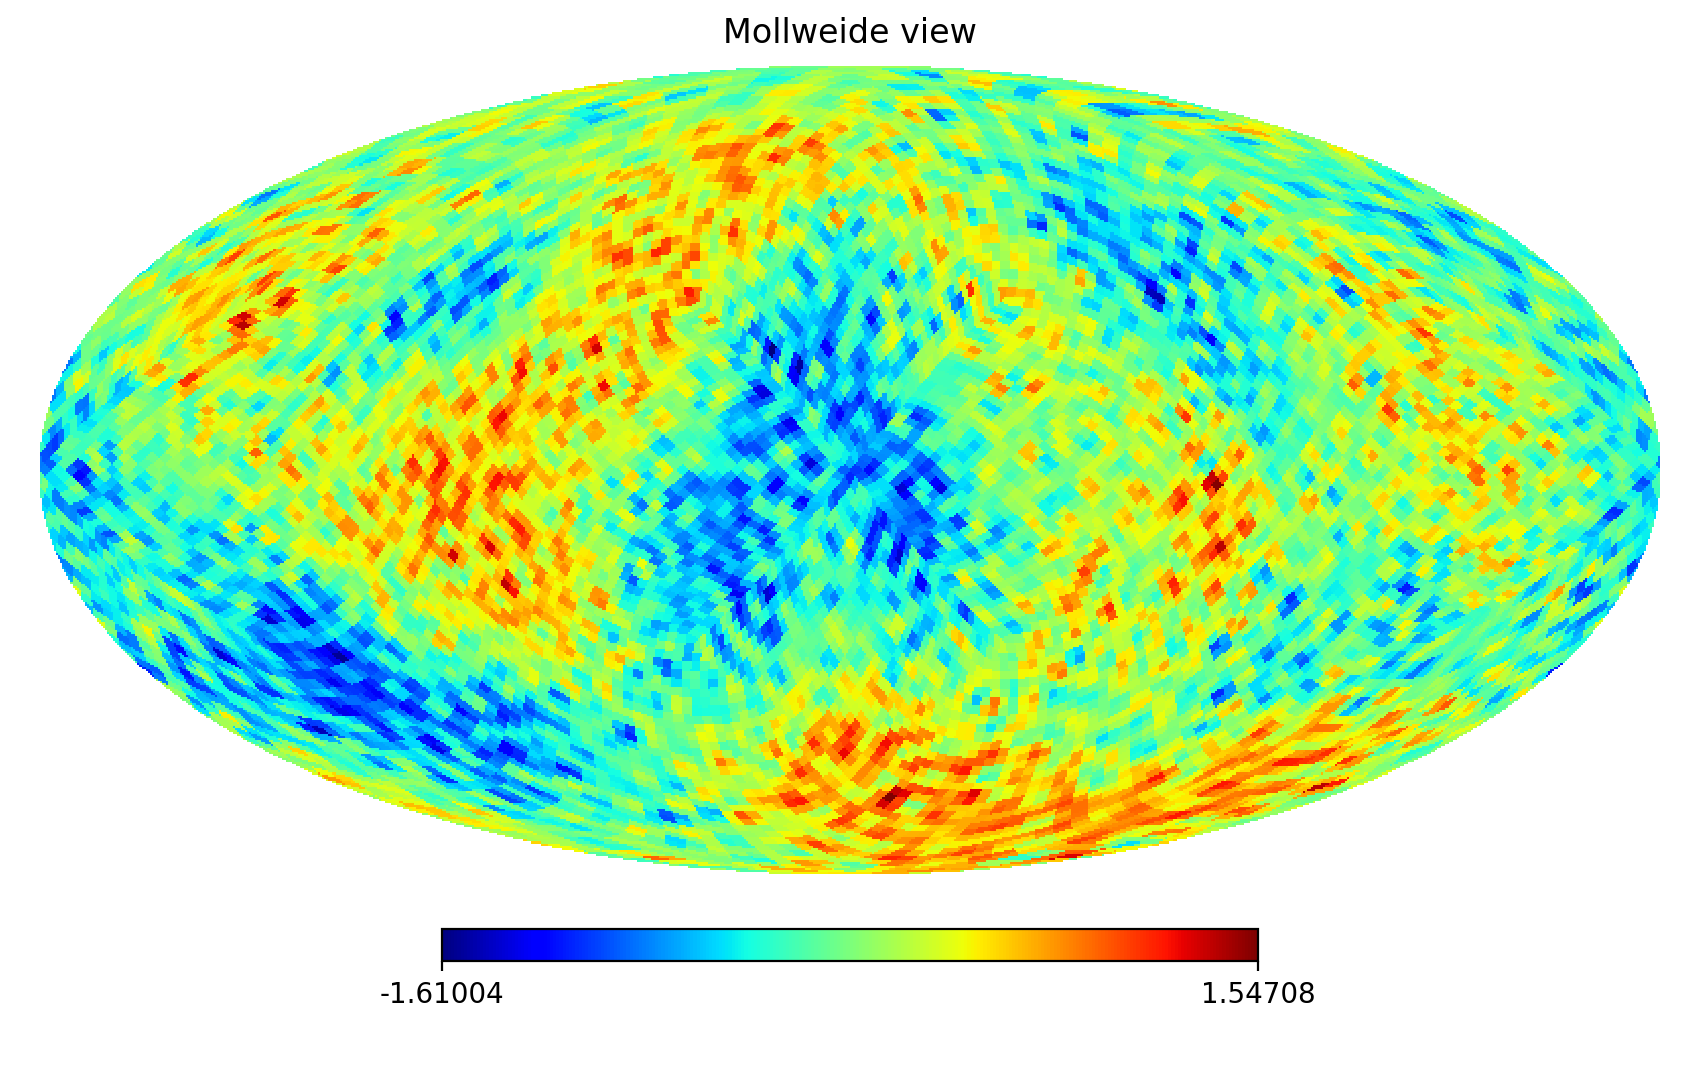

<IPython.core.display.Javascript object>


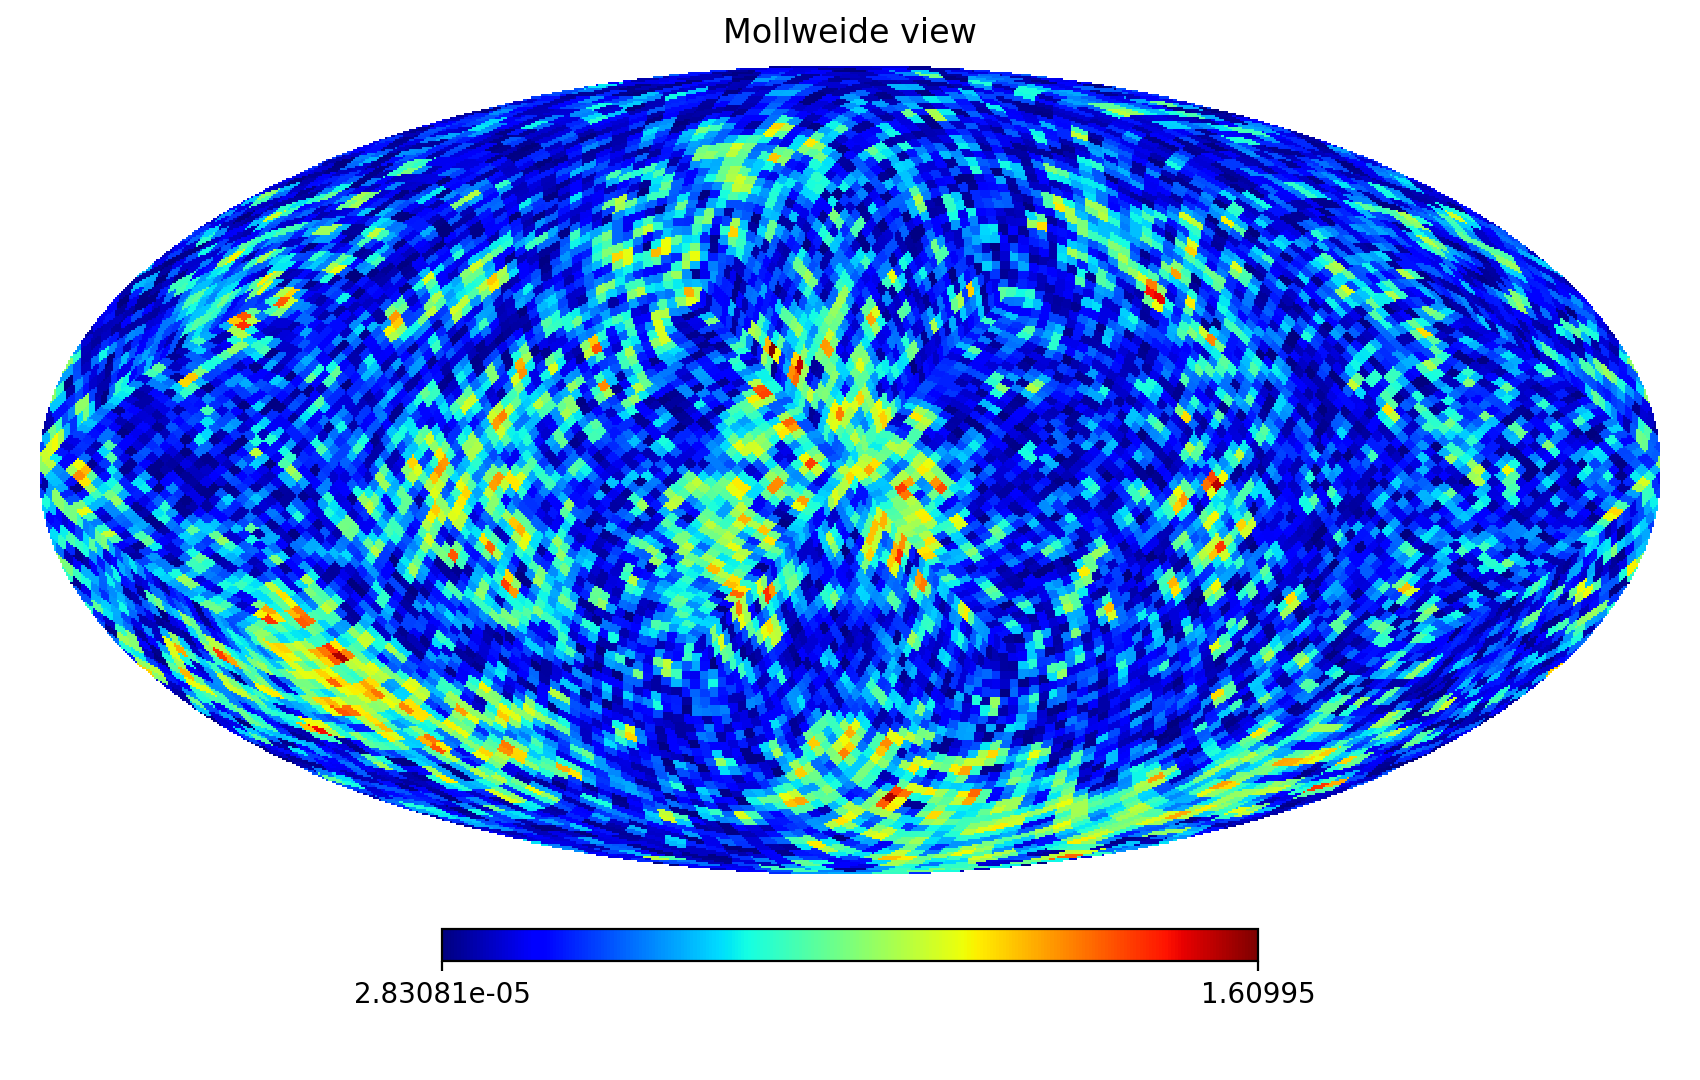

<IPython.core.display.Javascript object>


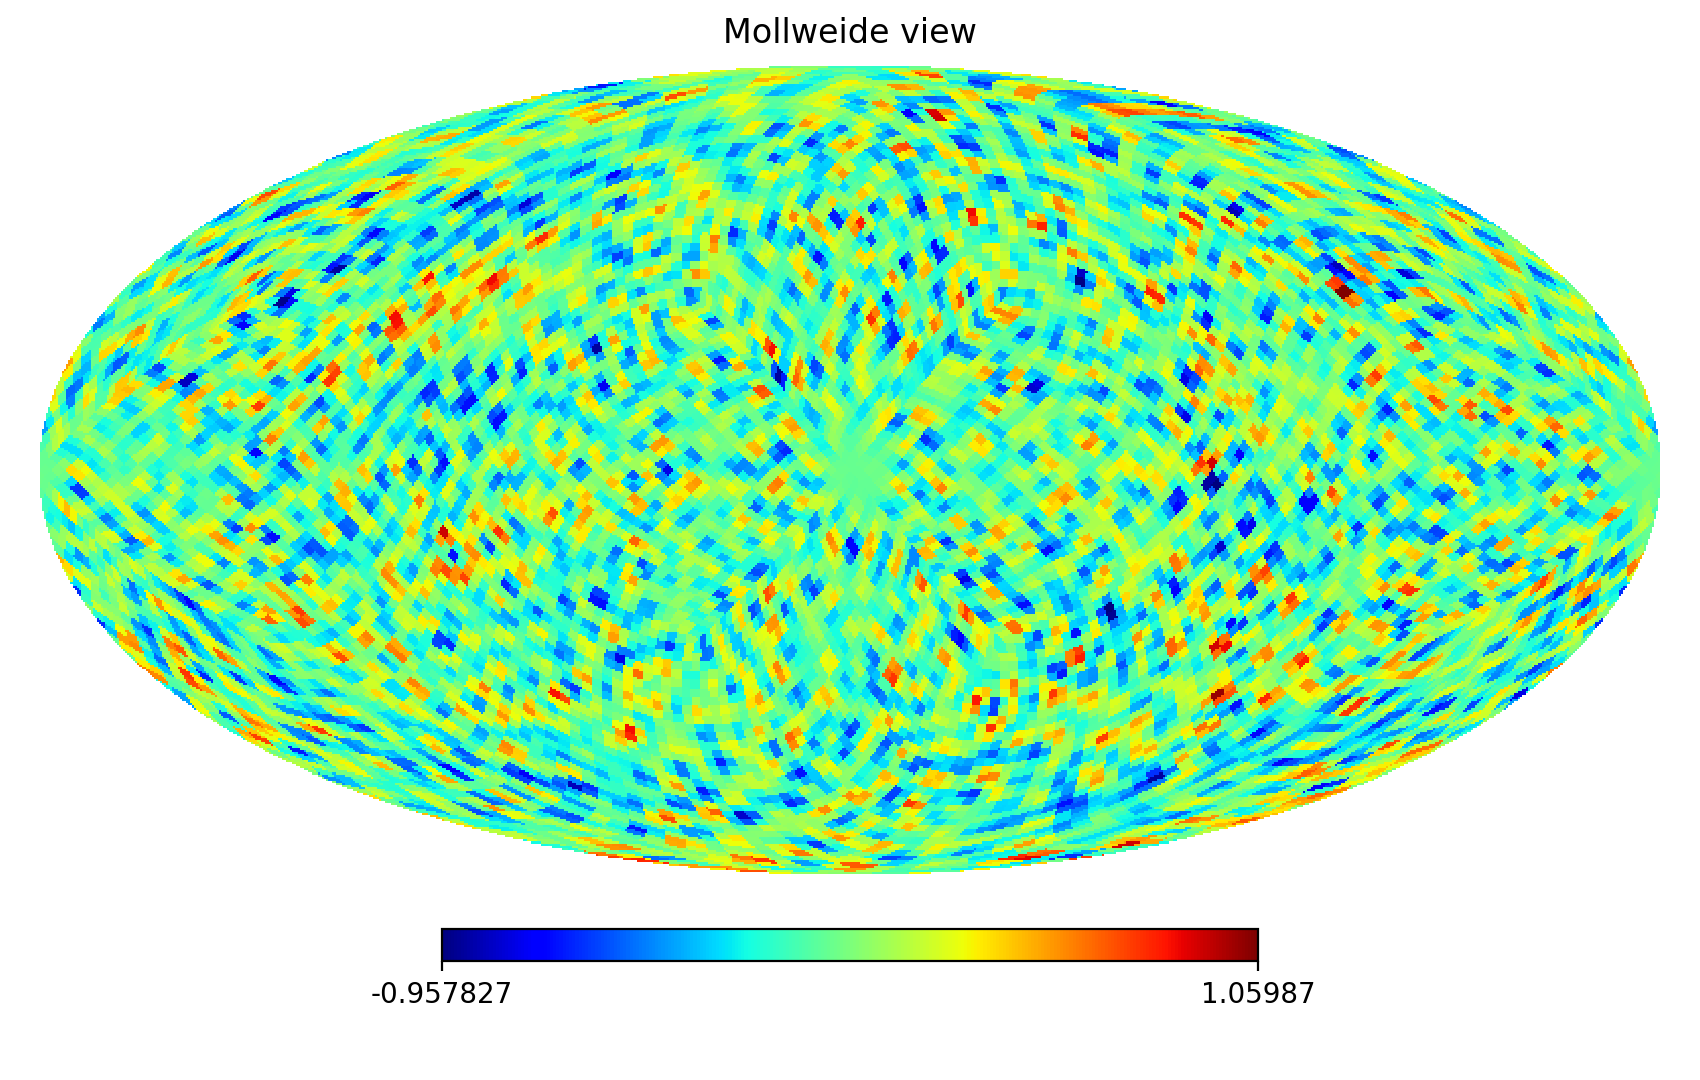

<IPython.core.display.Javascript object>


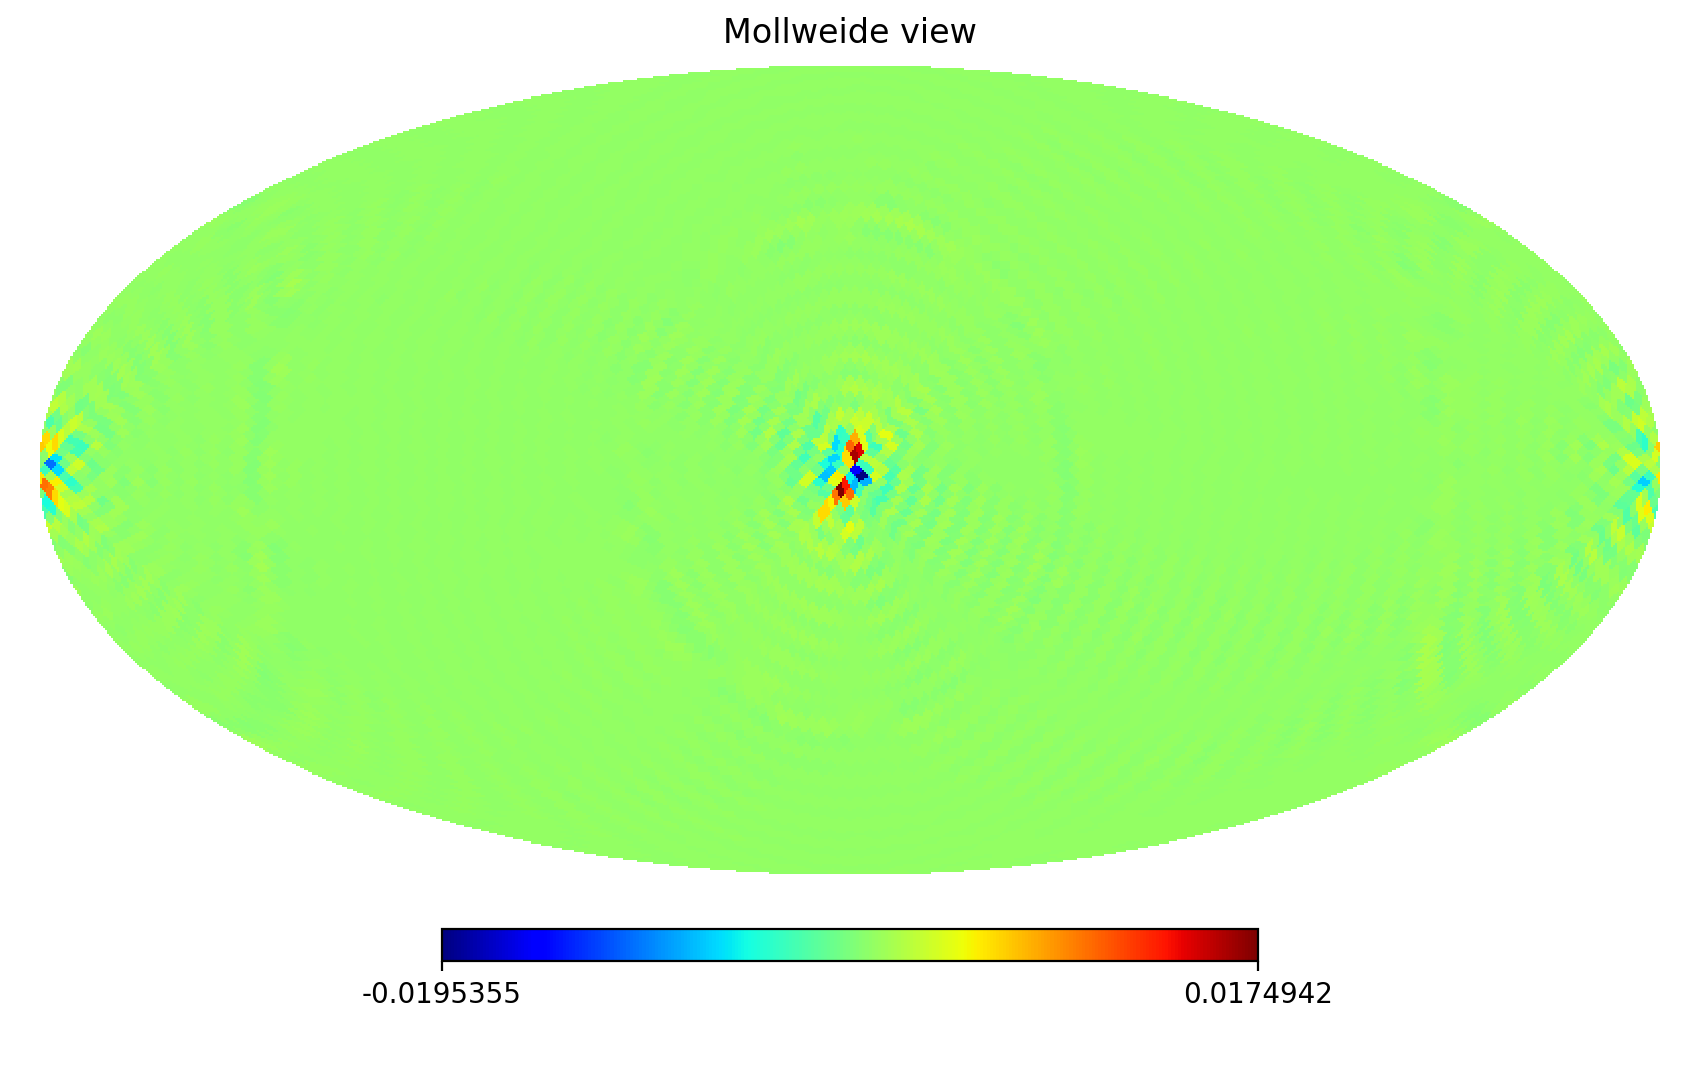

In [213]:
h.mollview(rteb[1],rot=(45,-90))
h.mollview(abs(tteb[1]),rot=(45,-90))
h.mollview(hteb[1]-tteb[1],rot=(45,-90))
h.mollview(rteb[2]-tteb[2],rot=(45,-90))

<IPython.core.display.Javascript object>


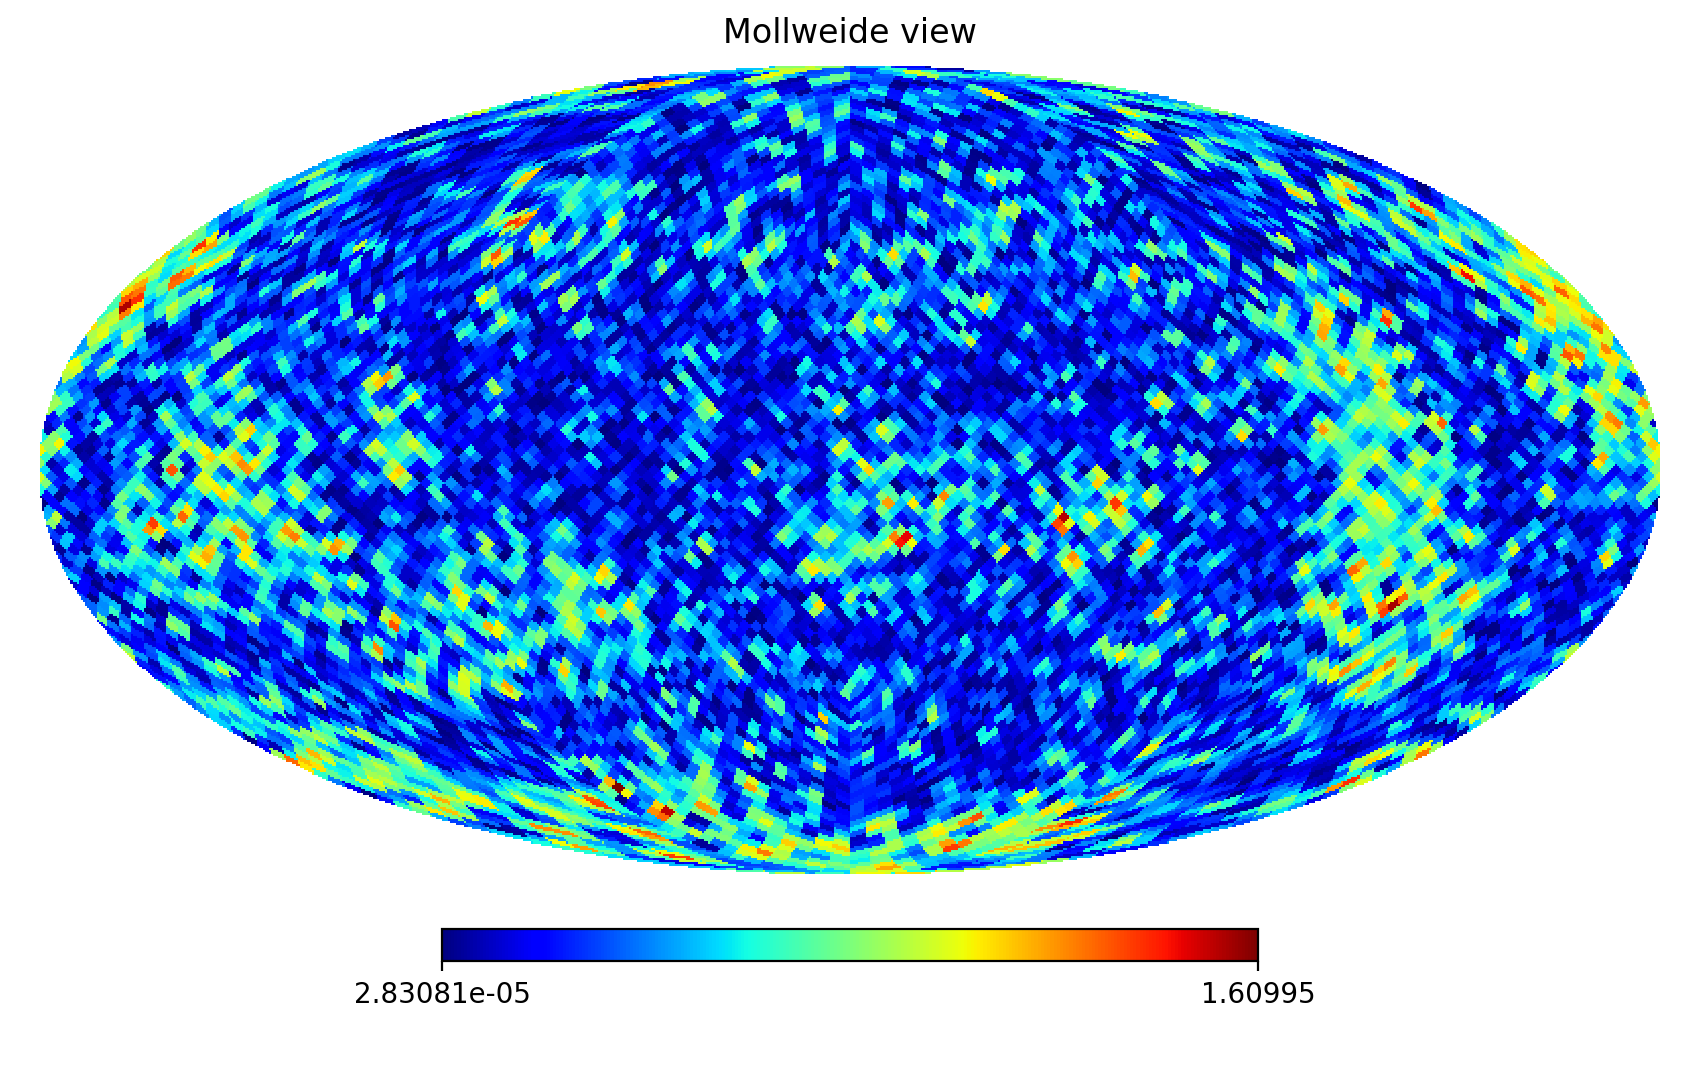

<IPython.core.display.Javascript object>


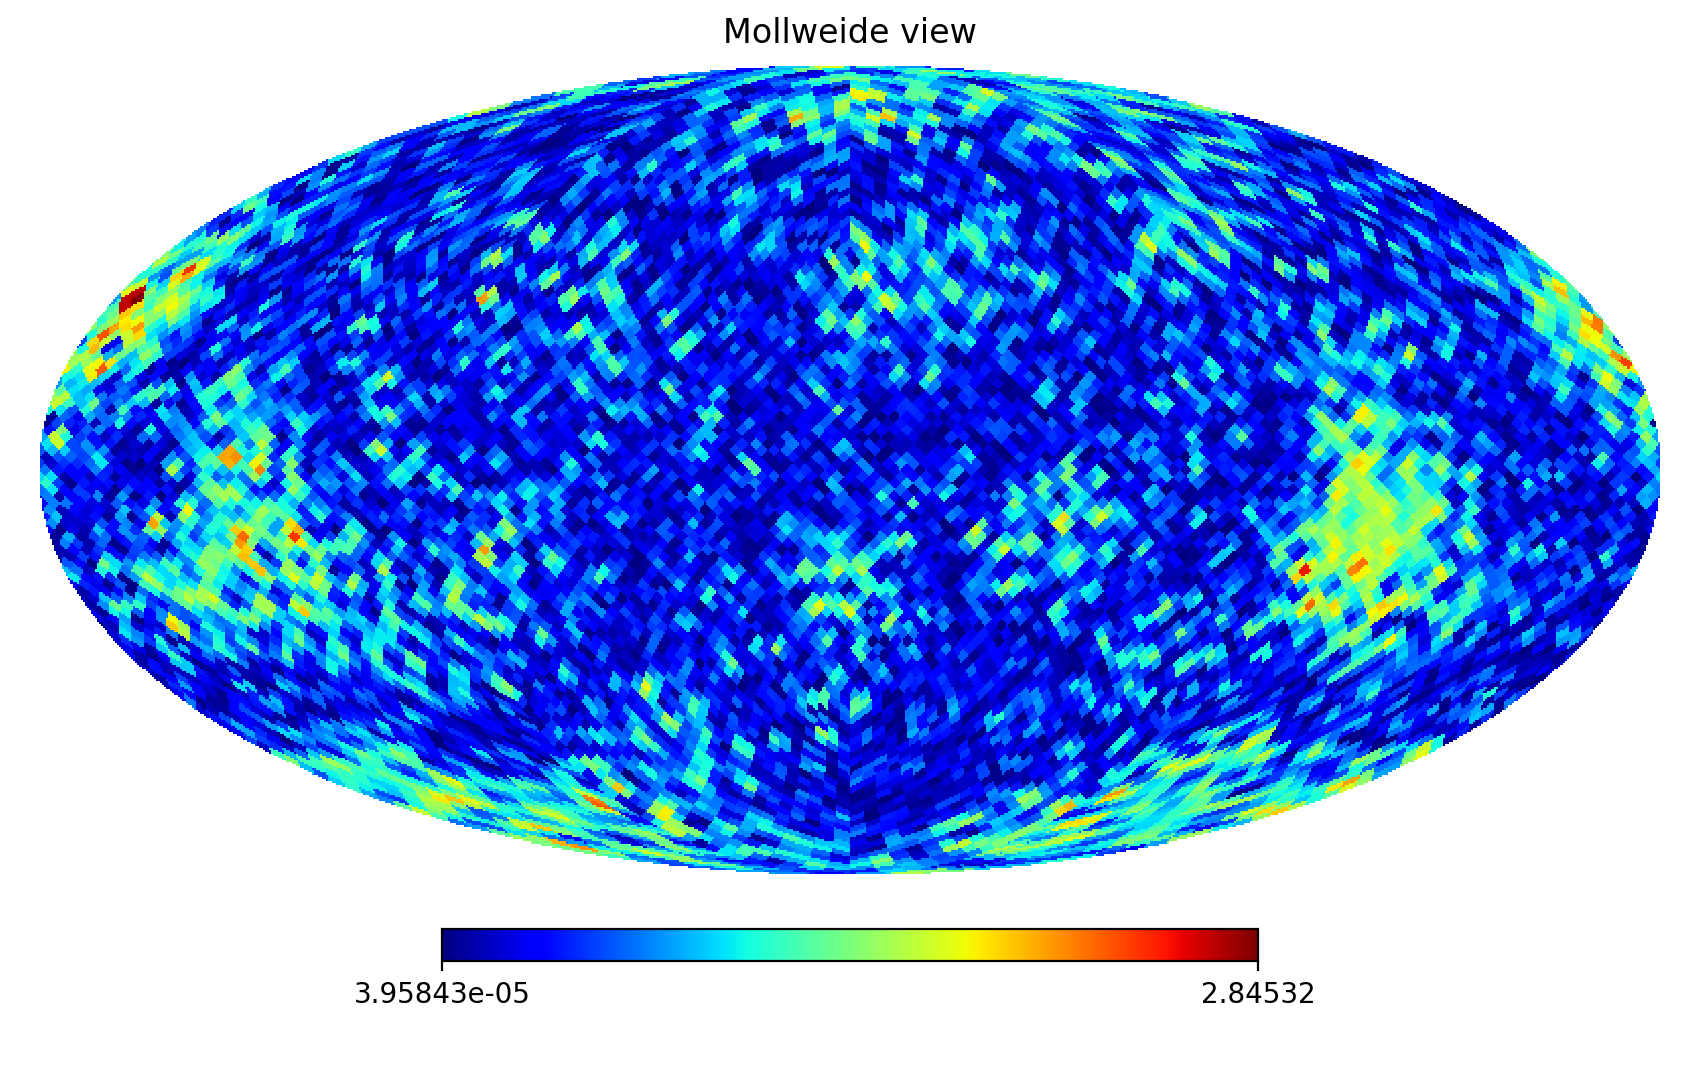

In [219]:
h.mollview(abs(tteb[1]),rot=(0,0))


h.mollview(sqrt(dr**2. + di**2.),rot=(0,0))

<IPython.core.display.Javascript object>


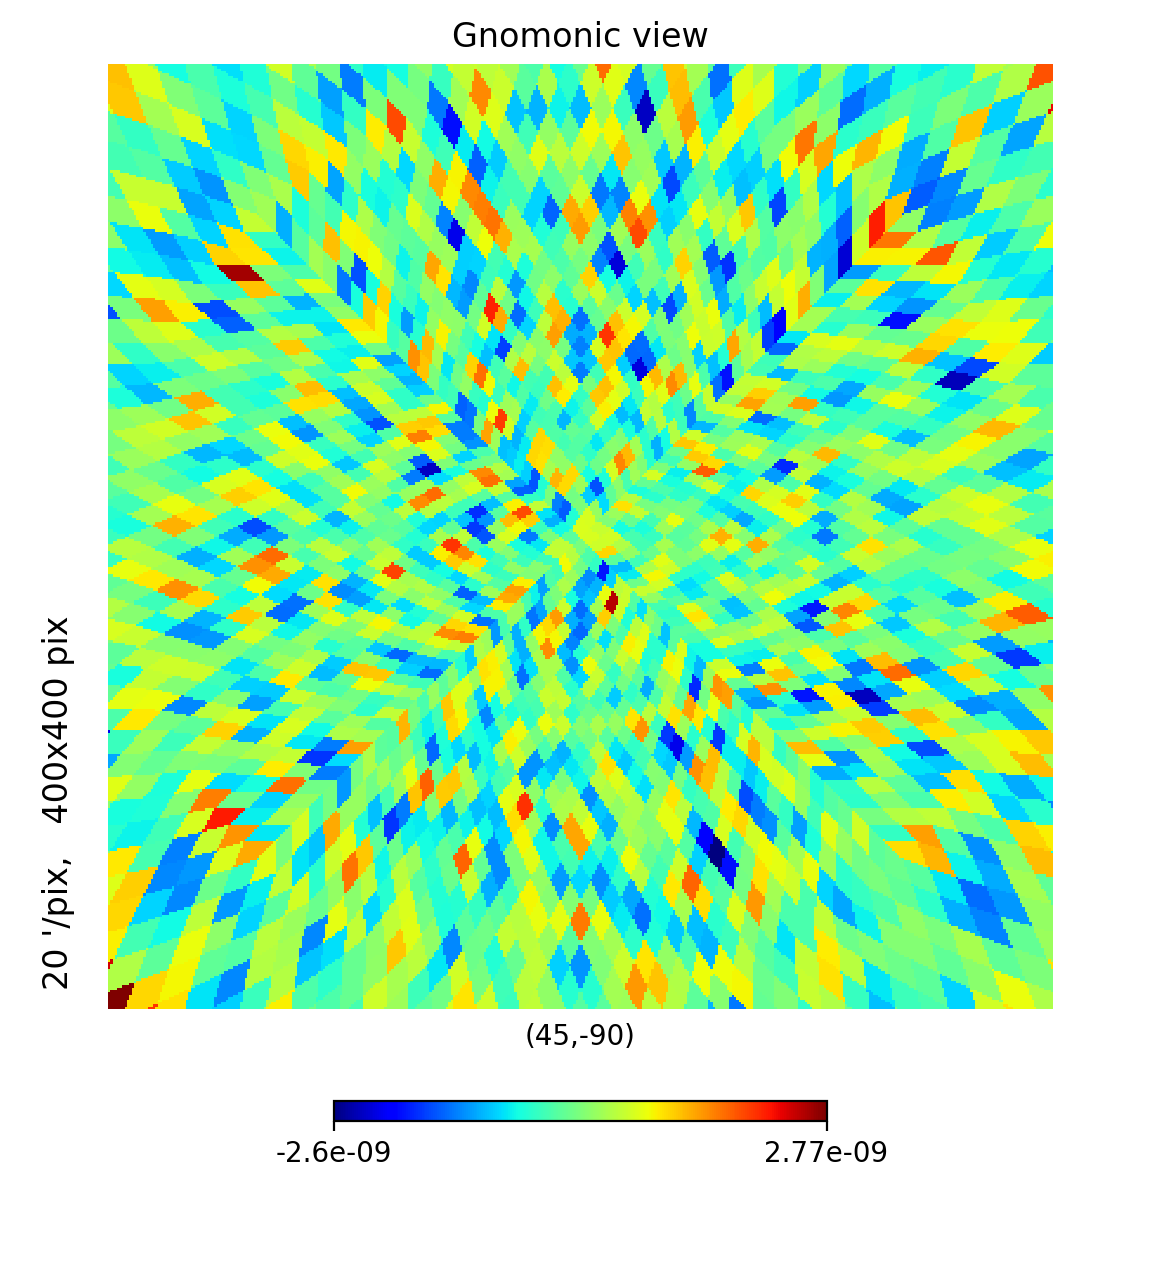

<IPython.core.display.Javascript object>


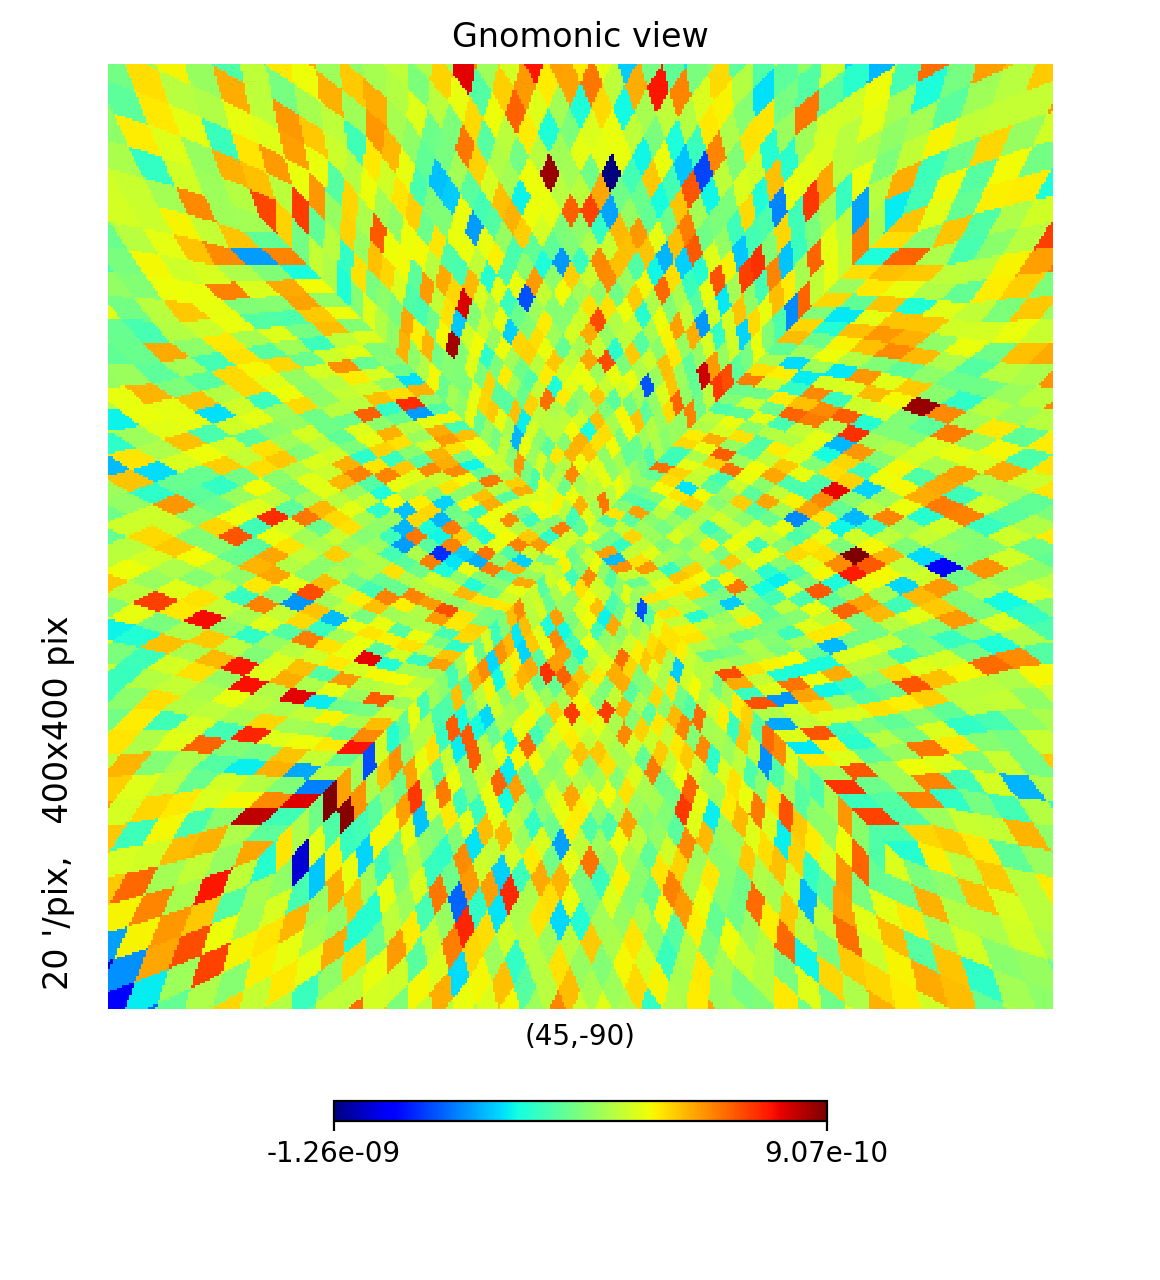

In [156]:
h.gnomview(hteb[1]-rteb[1] + 0.0*spole,rot=(45,-90),xsize=400,reso=20)
h.gnomview(hteb[2]-rteb[2],rot=(45,-90),xsize=400,reso=20)

#h.mollview(hteb[1]-tteb[1],rot=(45,-90))
#h.mollview(hteb[2]-tteb[2],rot=(45,-90))

In [208]:
clrteb=h.alm2cl(h.map2alm(rteb*mask,lmax=lmax,pol=False))
#clrtebo=h.alm2cl(h.map2alm(rtebo*mask,lmax=lmax,pol=False))
clhteb=h.alm2cl(h.map2alm(hteb*mask,lmax=lmax,pol=False,iter=1))
cltteb=h.alm2cl(h.map2alm(true_teb*mask,lmax=lmax,pol=False))

<IPython.core.display.Javascript object>


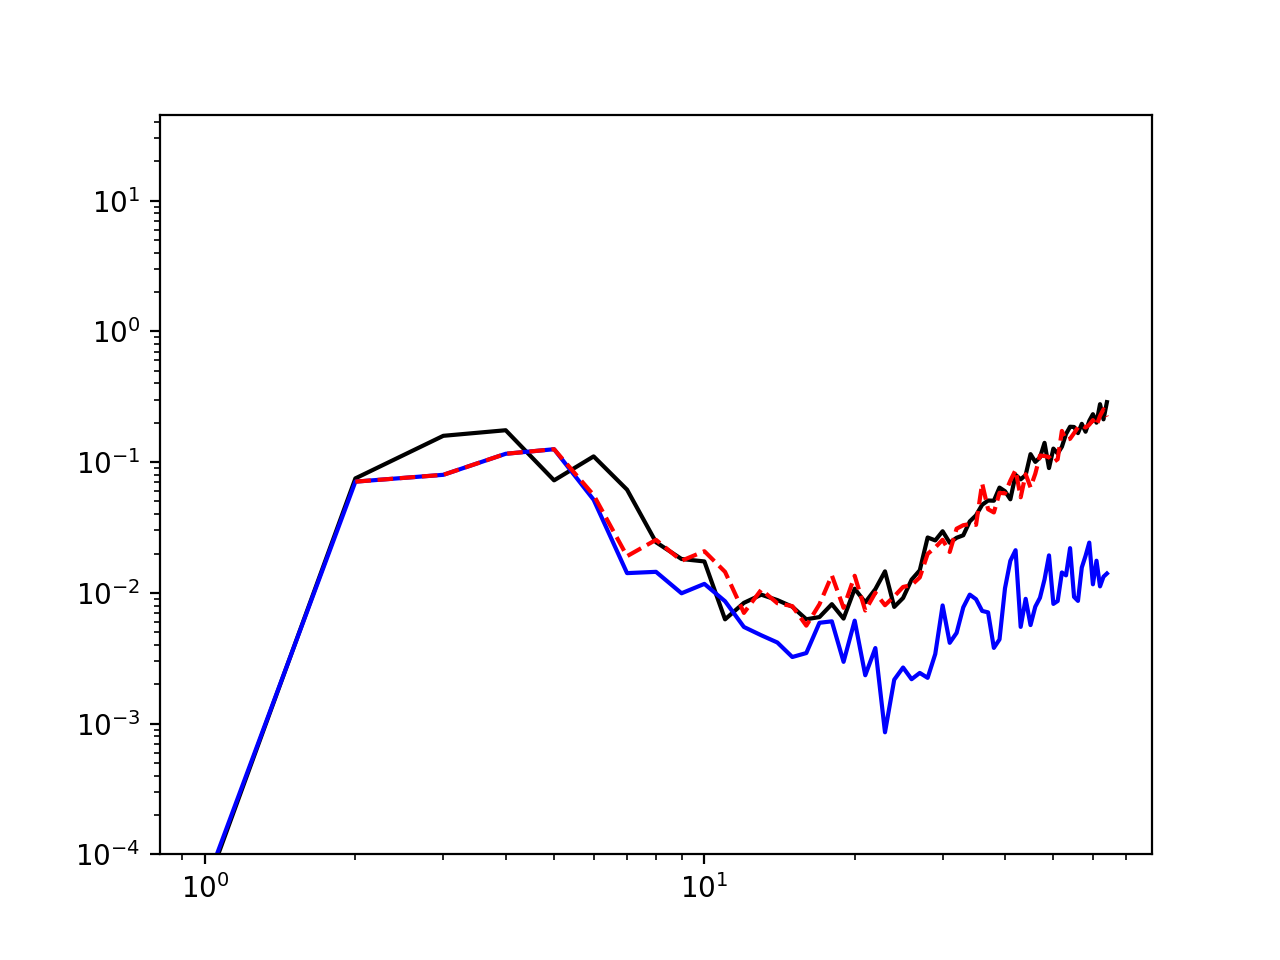

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


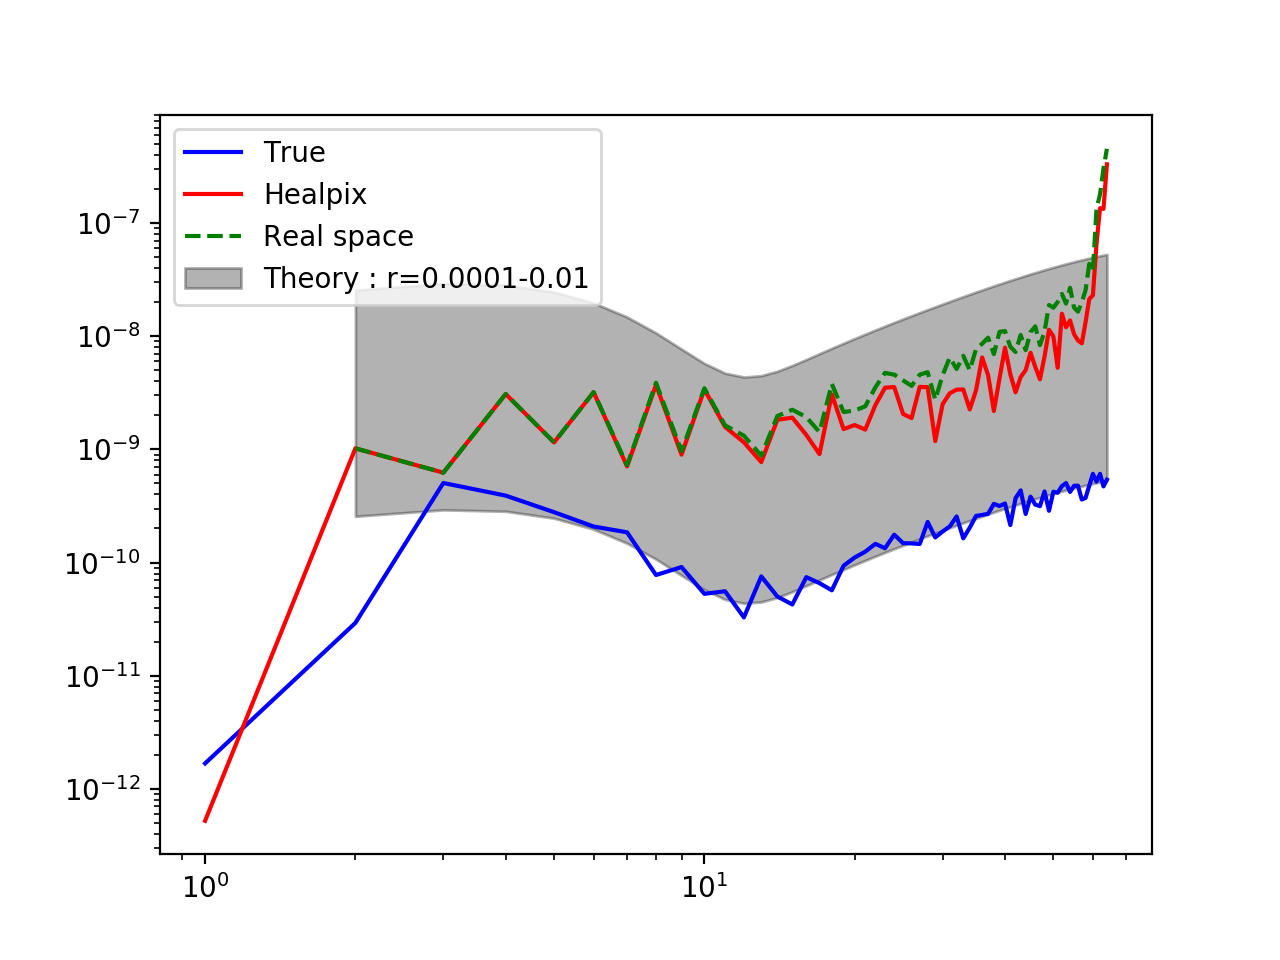

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


[]

In [211]:
ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)

figure()
plot(ell,fll*cltteb[1]/fsky,"k-",label="True")
plot(ell,fll*clhteb[1]/fsky,"b-",label="Healpix")
plot(ell,fll*clrteb[1]/(gl*gl*fsky),"r--",label="Real space")
#plot(ell,fll*clrtebo[1]/(gl*gl*fsky),"m--")
#semilogy()
loglog()
semilogx()
ylim(1e-4,45)

figure()
plot(ell,fll*cltteb[2]/fsky,"b-",label="True")
plot(ell,fll*clhteb[2]/fsky,"r-",label="Healpix")
plot(ell,fll*clrteb[2]/(gl*gl*fsky),"g--",label="Real space")
#plot(ell,fll*clrtebo[2]/(gl*gl*fsky),"m--")
fill_between(ell,fll*cltemp[2][:lmax+1]*0.1,fll*cltemp[2][:lmax+1]*10,color="k",alpha=0.3,label="Theory : r=0.0001-0.01")
legend(loc=0)
#semilogx()
loglog()
#ylim(1e-10,1e-8)

<IPython.core.display.Javascript object>


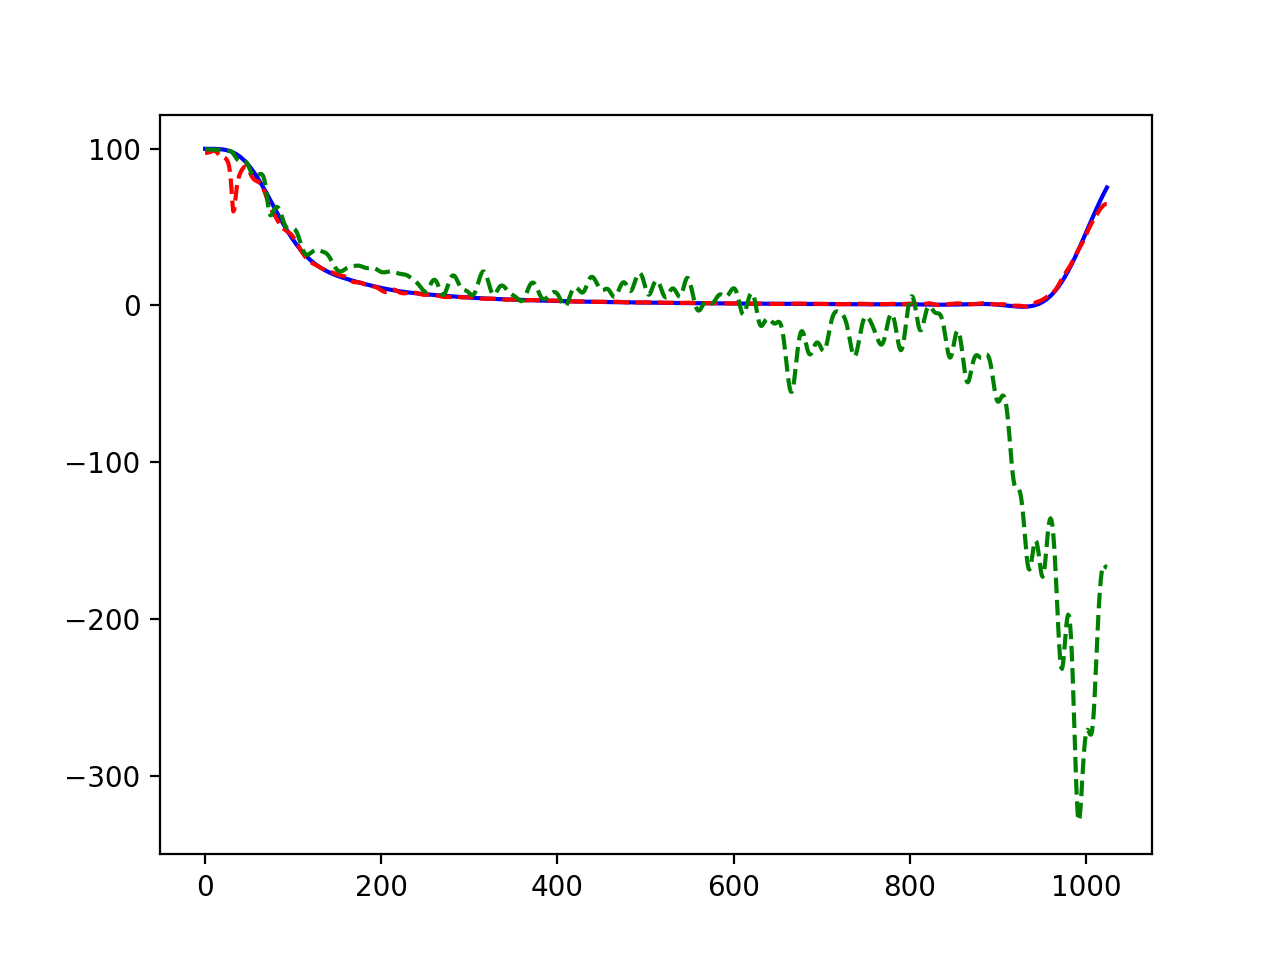

In [397]:
figure()
plot(ell,(1.-gl**2.)*100.,"b-")
plot(ell,(clhteb[1]-clrteb[1])*100/clhteb[1],"r--")
plot(ell,(clhteb[2]-clrteb[2])*100/clhteb[2],"g--")




#plot(ell,(clhteb[1]-cltteb[1])*100/clhteb[1],"k-")
#ylim(-10,10)
#semilogx()